# Float random numbers in Python and Numpy

https://towardsdatascience.com/how-to-generate-random-numbers-in-python-eb5aecf3e059

https://www.pythonpool.com/numpy-random/

https://www.javatpoint.com/numpy-random

https://docs.python.org/3/library/random.html#real-valued-distributions

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import copy
from time import time

# 1. Float from a linear distribution

## 1.1 From Python: random.random

random.random: Pseudo-random number generator using [Marsene Twister](https://en.wikipedia.org/wiki/Mersenne_Twister). The float values are drawn from a uniform half-open, distribution, meaning the low edge is included, but the high edge is excluded [0.0, 1.0)

In [2]:
# every time we get a different number
value = random.random()
print(value)
value = random.random()
print(value)
value = random.random()
print(value)

0.5015756943334001
0.45171187056563344
0.21724379031457908


In [3]:
# if we want to get these three numbers again,
# it is not enough to just call it three times
# as long as we go on we will get other new values
value = random.random()
print(value)
value = random.random()
print(value)
value = random.random()
print(value)

0.9779935312630812
0.6305018861976718
0.9225977509210885


In [4]:
# to be able to reproduce the sequence, we set a seed value
# from than on it resets the values
random.seed(42)
value = random.random()
print(value)
value = random.random()
print(value)
value = random.random()
print(value)

0.6394267984578837
0.025010755222666936
0.27502931836911926


In [5]:
# other seed will give other values
random.seed(1)
value = random.random()
print(value)
value = random.random()
print(value)
value = random.random()
print(value)

0.13436424411240122
0.8474337369372327
0.763774618976614


In [6]:
# we can reproduce the first values values by resetting the seed again
random.seed(42)
value = random.random()
print(value)
value = random.random()
print(value)
value = random.random()
print(value)

0.6394267984578837
0.025010755222666936
0.27502931836911926


In [7]:
# we can reproduce the first values values by resetting the seed again
random.seed(1)
value = random.random()
print(value)
value = random.random()
print(value)
value = random.random()
print(value)

0.13436424411240122
0.8474337369372327
0.763774618976614


Let's check that indeed the numbers are from the linear uniform distribution between [0, 1]

So let's generate several numbers and plot them in a histogram. 

Indeed, the range is confirmed to be [0, 1). The more numbers there are, the closer the distribution to uniform.

list_value has 100 elements


(array([2., 1., 5., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 0., 2., 2., 3., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 1., 1., 2., 0., 1., 3., 2., 2., 1., 2., 0., 0., 3., 2.,
        2., 2., 0., 2., 3., 1., 0., 1., 3., 0., 0., 0., 0., 1., 1., 0., 2.,
        0., 0., 2., 1., 2., 0., 1., 0., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
        2., 2., 0., 1., 1., 1., 0., 0., 0., 2., 2., 1., 0., 1., 2.]),
 array([0.00210605, 0.01201043, 0.0219148 , 0.03181917, 0.04172355,
        0.05162792, 0.06153229, 0.07143667, 0.08134104, 0.09124542,
        0.10114979, 0.11105416, 0.12095854, 0.13086291, 0.14076728,
        0.15067166, 0.16057603, 0.1704804 , 0.18038478, 0.19028915,
        0.20019353, 0.2100979 , 0.22000227, 0.22990665, 0.23981102,
        0.24971539, 0.25961977, 0.26952414, 0.27942851, 0.28933289,
        0.29923726, 0.30914163, 0.31904601, 0.32895038, 0.33885476,
        0.34875913, 0.3586635 , 0.36856788, 0.37847225, 0.38837662,
      

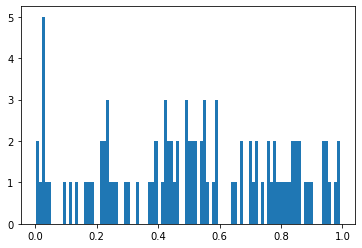

In [8]:
# one hundred
N = 100
random.seed(1)
list_value = [random.random() for _ in range(N)]
print(f"list_value has {len(list_value)} elements")
# let's plot the histogram
plt.hist(list_value, bins = 100)

list_value has 1000 elements


(array([11.,  9., 16., 12.,  7.,  7.,  7.,  9.,  8., 10., 12., 12.,  7.,
         8.,  5.,  9., 12.,  9.,  7.,  3.,  9.,  9., 10.,  9., 10., 14.,
        12.,  8.,  7., 12., 12., 11., 10.,  9., 12.,  8.,  6., 11., 11.,
        11., 11.,  9., 10., 10., 10.,  9.,  7.,  3., 10., 12., 14., 12.,
        14.,  6., 20.,  8.,  7., 14., 10., 10.,  9.,  7.,  7., 10., 12.,
         8.,  8., 11.,  9.,  6., 13., 14.,  9.,  7., 16.,  7.,  9.,  7.,
        12., 14.,  9., 11.,  6., 14., 15., 14., 11.,  5., 15., 11., 12.,
        13., 10.,  5.,  8.,  7., 10., 17., 16.,  9.]),
 array([8.44717949e-04, 1.08178703e-02, 2.07910226e-02, 3.07641750e-02,
        4.07373273e-02, 5.07104797e-02, 6.06836320e-02, 7.06567844e-02,
        8.06299367e-02, 9.06030890e-02, 1.00576241e-01, 1.10549394e-01,
        1.20522546e-01, 1.30495698e-01, 1.40468851e-01, 1.50442003e-01,
        1.60415155e-01, 1.70388308e-01, 1.80361460e-01, 1.90334612e-01,
        2.00307765e-01, 2.10280917e-01, 2.20254070e-01, 2.30227222e-01,
  

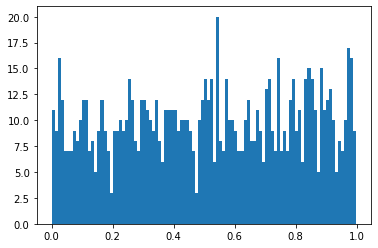

In [9]:
# one thousand
N = 1000
random.seed(1)
list_value = [random.random() for _ in range(N)]
print(f"list_value has {len(list_value)} elements")
# let's plot the histogram
plt.hist(list_value, bins = 100)

list_value has 10000 elements


(array([113., 116.,  89., 110., 110., 113., 101.,  95.,  93., 106.,  96.,
         98.,  79.,  92., 116.,  97., 112., 116.,  91., 120., 103., 124.,
         86.,  90.,  98.,  99.,  94.,  84.,  87.,  88., 104., 104.,  98.,
         84., 102., 108., 100., 110., 106., 109.,  98.,  89., 116., 120.,
         99., 100.,  97.,  90.,  82.,  92.,  91.,  97.,  93.,  93., 123.,
         99.,  93., 107., 101., 101., 100., 111., 104.,  97., 104.,  86.,
        117.,  98., 100.,  81., 105.,  95.,  91.,  65., 115., 101., 100.,
         98.,  96.,  94.,  92., 106.,  97., 104.,  97., 128.,  87.,  92.,
         90.,  92., 112., 101., 116.,  99.,  92.,  82., 117., 109., 100.,
        107.]),
 array([2.21705855e-04, 1.02188482e-02, 2.02159906e-02, 3.02131330e-02,
        4.02102754e-02, 5.02074178e-02, 6.02045602e-02, 7.02017026e-02,
        8.01988450e-02, 9.01959874e-02, 1.00193130e-01, 1.10190272e-01,
        1.20187415e-01, 1.30184557e-01, 1.40181699e-01, 1.50178842e-01,
        1.60175984e-01, 1.7017

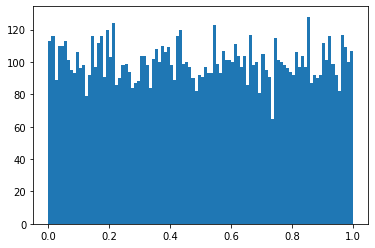

In [10]:
# ten thousand
N = 10_000
random.seed(1)
list_value = [random.random() for _ in range(N)]
print(f"list_value has {len(list_value)} elements")
# let's plot the histogram
plt.hist(list_value, bins = 100)

list_value has 100000 elements


(array([1012.,  985., 1029.,  954.,  959., 1022.,  984., 1007.,  974.,
        1049., 1045.,  993.,  962.,  955., 1046., 1001., 1026., 1014.,
        1028., 1026., 1014., 1013.,  964., 1044., 1008., 1007.,  963.,
         999.,  945.,  949.,  952., 1008.,  985.,  934., 1022.,  941.,
         980., 1025., 1025., 1007.,  989., 1021., 1069., 1050.,  994.,
        1060., 1017.,  977.,  994., 1013., 1058.,  935., 1029., 1033.,
        1036., 1014., 1038., 1019.,  985.,  994., 1011.,  987.,  958.,
        1005.,  969., 1002.,  955.,  974.,  983.,  991.,  990.,  943.,
        1017.,  991.,  991., 1023.,  994.,  935.,  948.,  984.,  950.,
        1004., 1006., 1018.,  981., 1015.,  996., 1022., 1045.,  981.,
        1072.,  979., 1021., 1011.,  969., 1000.,  976., 1025., 1059.,
        1038.]),
 array([1.85316793e-05, 1.00182669e-02, 2.00180022e-02, 3.00177375e-02,
        4.00174727e-02, 5.00172080e-02, 6.00169433e-02, 7.00166785e-02,
        8.00164138e-02, 9.00161491e-02, 1.00015884e-01, 1.

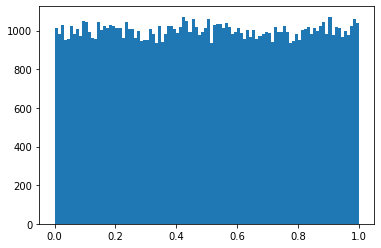

In [11]:
# hundred thousand
N = 100_000
random.seed(1)
list_value = [random.random() for _ in range(N)]
print(f"list_value has {len(list_value)} elements")
# let's plot the histogram
plt.hist(list_value, bins = 100)

list_value has 1000000 elements


(array([ 9973.,  9943., 10070.,  9875.,  9897., 10143.,  9991.,  9883.,
         9965.,  9986., 10151., 10031.,  9987., 10167., 10211.,  9956.,
        10270.,  9842., 10019.,  9950.,  9952., 10086.,  9972.,  9970.,
        10001.,  9998.,  9838.,  9979., 10148.,  9986.,  9896.,  9866.,
         9991.,  9767.,  9979.,  9860.,  9962.,  9995.,  9994.,  9836.,
        10012.,  9931., 10071., 10091.,  9827., 10158., 10070.,  9964.,
         9946., 10103., 10015.,  9980.,  9994.,  9988., 10151., 10045.,
         9955., 10012.,  9893., 10004., 10084., 10028.,  9991.,  9934.,
         9998., 10208.,  9844.,  9907.,  9927., 10208., 10006.,  9913.,
        10053., 10028.,  9969., 10202., 10040.,  9986.,  9883., 10081.,
         9954.,  9954.,  9946., 10058., 10129., 10120.,  9920.,  9868.,
         9974.,  9919., 10184., 10015., 10004.,  9961., 10021., 10123.,
         9867., 10005., 10101.,  9991.]),
 array([9.79097042e-07, 1.00009640e-02, 2.00009488e-02, 3.00009337e-02,
        4.00009185e-02

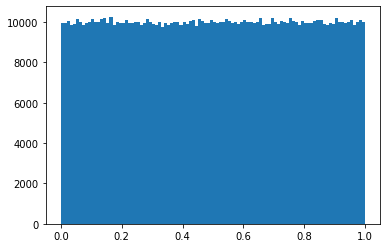

In [12]:
# one million
N = 1_000_000
random.seed(1)
list_value = [random.random() for _ in range(N)]
print(f"list_value has {len(list_value)} elements")
# let's plot the histogram
plt.hist(list_value, bins = 100)

list_value has 10000000 elements


(array([ 99781., 100374.,  99823., 100042.,  99764., 100225.,  99888.,
         99903.,  99982.,  99974., 100248.,  99788.,  99905.,  99771.,
        100177., 100070., 100867., 100077., 100422., 100128., 100092.,
         99964., 100055., 100312.,  99713., 100412.,  99929.,  99701.,
        100093.,  99668.,  99483.,  99545.,  99835.,  99889., 100545.,
         99766., 100326.,  99374.,  99808., 100015., 100495.,  99936.,
        100162.,  99767.,  99629.,  99947.,  99968.,  99886.,  99680.,
        100366., 100157.,  99602., 100541., 100178.,  99560., 100531.,
        100010.,  99601., 100199.,  99883., 100039., 100244.,  99996.,
        100376., 100081., 100527.,  99608., 100141., 100332.,  99819.,
        100165.,  99802., 100523., 100239.,  99812., 100322.,  99919.,
         99623.,  99543., 100387., 100454.,  99322., 100151., 100261.,
        100029.,  99649.,  99408., 100099., 100065., 100221., 100446.,
         99893., 100181.,  99872., 100015.,  99755.,  99336., 100257.,
      

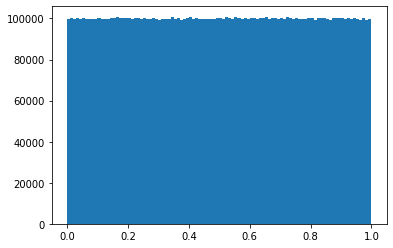

In [13]:
# ten million
N = 10_000_000
random.seed(1)
list_value = [random.random() for _ in range(N)]
print(f"list_value has {len(list_value)} elements")
# let's plot the histogram
plt.hist(list_value, bins = 100)

Producing 10 million points took a few seconds. Can we do it faster? 

Here is where numpy library comes into play. 

It also has a random module. 

## 1.2 Numpy's random module

In [14]:
np.random.seed(1)
value = np.random.random()
print(value)
value = np.random.random()
print(value)
value = np.random.random()
print(value)
print()
np.random.seed(1)
value = np.random.random()
print(value)
value = np.random.random()
print(value)
value = np.random.random()
print(value)
print()
value = np.random.random()
print(f"type={type(value)}, value={value}")

0.417022004702574
0.7203244934421581
0.00011437481734488664

0.417022004702574
0.7203244934421581
0.00011437481734488664

type=<class 'float'>, value=0.30233257263183977


In [15]:
# but we can also generate directly in a container
# notice we get the same three values as before, since we reset the set again before this step
np.random.seed(1)
values = np.random.random(3)
print(f"type={type(values)}, values={values}")
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, values=[4.17022005e-01 7.20324493e-01 1.14374817e-04]
type=<class 'numpy.ndarray'>, shape=(3,), dtype=float64, values=
[4.17022005e-01 7.20324493e-01 1.14374817e-04]


In [16]:
# we can use another name for the same function, random_sample instead of random
# to look familiar for people moving from Matlab
np.random.seed(1)
values = np.random.random_sample(3)
print(f"type={type(values)}, values={values}")
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, values=[4.17022005e-01 7.20324493e-01 1.14374817e-04]
type=<class 'numpy.ndarray'>, shape=(3,), dtype=float64, values=
[4.17022005e-01 7.20324493e-01 1.14374817e-04]


##  1.3 Timing Python vs Numpy

So let's time how long it takes to create the 10 million number of elements with Python vs with Numpy

In [17]:
from time import time

list_value has 10000000 elements, time to fill list is 1.945662021636963 seconds, time to plot hist is 69.54409122467041 seconds.


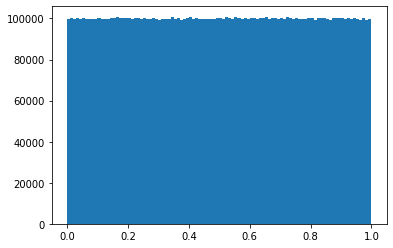

In [18]:
# ten million
N = 10_000_000
random.seed(1)
start1 = time()
list_value = [random.random() for _ in range(N)]
end1 = time()
# let's plot the histogram
start2 = time()
plt.hist(list_value, bins = 100)
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 0.34282898902893066 seconds, time to plot hist is 0.26828503608703613 seconds.


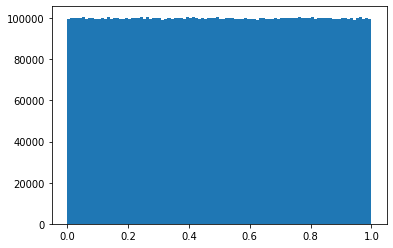

In [19]:
# ten million
N = 10_000_000
random.seed(1)
start1 = time()
list_value = np.random.random(N)
end1 = time()
# let's plot the histogram
start2 = time()
plt.hist(list_value, bins = 100)
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to plot hist is {end2 - start2} seconds.")

Indeed, filling the container is 7 times faster, and plotting the histogram is 175 times faster.

We can try an intermediate step to transform first the list into a numpy array

list_value has 10000000 elements, time to fill list is 1.8532421588897705 seconds, time to convert the list to a numpy array is 0.45853590965270996 seconds, time to plot hist is 0.9495387077331543 seconds.


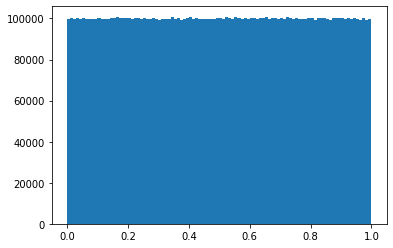

In [20]:
# ten million
N = 10_000_000
random.seed(1)
start1 = time()
list_value = [random.random() for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
plt.hist(nparray_value, bins = 100)
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

Yes, that is already better. So it is crucial to convert a list to numpy array before plotting in matplotlib in order to be fast. And it helps even further to create the array directly with the numpy library!

## 1.4 Extend distribution from [0, 1) to [a, b)

value => a + (b-a) * value

or

Python: random.uniform(a, b)

Numpy: np.random.uniform(a, b, N)

In [21]:
a = 10
b = 15

In [22]:
# we get exactly the same values for Python
random.seed(1)
values = np.array([a + (b-a) * random.random() for _ in range(5)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
random.seed(1)
values = np.array([random.uniform(a, b) for _ in range(5)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[10.67182122 14.23716868 13.81887309 11.27534513 12.47717544]
type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[10.67182122 14.23716868 13.81887309 11.27534513 12.47717544]


list_value has 10000000 elements, time to fill list is 3.850476026535034 seconds, time to convert the list to a numpy array is 0.45537900924682617 seconds, time to plot hist is 0.4077167510986328 seconds.


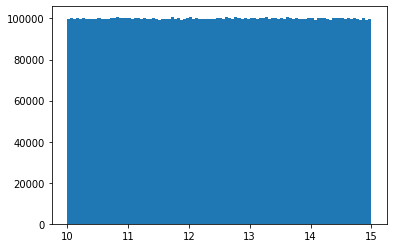

In [23]:
# ten million with Python
N = 10_000_000
random.seed(1)
start1 = time()
list_value = [a + (b - a) * random.random() for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
plt.hist(nparray_value, bins = 100)
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 4.926265716552734 seconds, time to convert the list to a numpy array is 0.4452321529388428 seconds, time to plot hist is 0.4341700077056885 seconds.


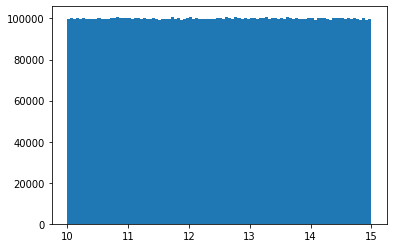

In [24]:
# ten million with Python
N = 10_000_000
random.seed(1)
start1 = time()
list_value = [random.uniform(a, b) for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
plt.hist(nparray_value, bins = 100)
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

In [25]:
# we get exactly the same values for Numpy
np.random.seed(1)
values = a + (b-a) * np.random.random(5)
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
np.random.seed(1)
values = np.array([np.random.uniform(a, b) for _ in range(5)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[12.08511002 13.60162247 10.00057187 11.51166286 10.73377945]
type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[12.08511002 13.60162247 10.00057187 11.51166286 10.73377945]


list_value has 10000000 elements, time to fill list is 0.14302372932434082 seconds, time to plot hist is 0.49533915519714355 seconds.


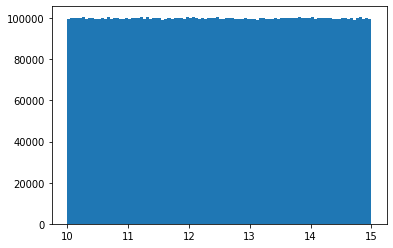

In [26]:
# ten million with Numpy
N = 10_000_000
np.random.seed(1)
start1 = time()
nparray_value = a + (b - a) * np.random.random(N)
end1 = time()
# let's plot the histogram
start2 = time()
plt.hist(nparray_value, bins = 100)
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 0.12857770919799805 seconds, time to plot hist is 0.2839808464050293 seconds.


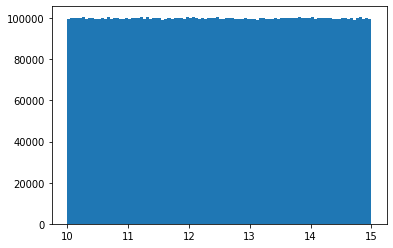

In [27]:
# ten million with Numpy
N = 10_000_000
np.random.seed(1)
start1 = time()
nparray_value = np.random.uniform(a, b, N)
end1 = time()
# let's plot the histogram
start2 = time()
plt.hist(nparray_value, bins = 100)
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to plot hist is {end2 - start2} seconds.")

It is confirmed the range looks like expected and indeed using Numpy is faster than using native Python.

Now let's move also for floats to have other distributions.

# 2. Float from a Gaussian distribution

Python1: np.array([random.gauss(mu, sigma) for _ in range(N)]

Python2: np.array([random.normalvariate(mu, sigma) for _ in range(N)]

normalvariate is a bit slower than .gauss, but is thread-safe. It means that when running in multi-threading, gauss can sometimes return the same output to all the threads. There are ways to avoid that, like using a different seed number to each thread. But best to use normalvariate() instad. 

Numpy 1: mu + sigma * np.random.nrandn(N)

Numpy 2: np.random.normal(mu, sigma, N)

In [28]:
# we get exactly the same values for Python
# note that for the same seed, random.gauss and random.normalvariate do not get the same values
mu = 5.0
sigma = 2.0
random.seed(1)
values = np.array([random.gauss(mu, sigma) for _ in range(5)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
random.seed(1)
values = np.array([random.normalvariate(mu, sigma) for _ in range(5)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
random.seed(1)
values = np.array([random.gauss(mu, sigma) for _ in range(5)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
random.seed(1)
values = np.array([random.normalvariate(mu, sigma) for _ in range(5)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[7.57636951 7.89889122 5.13267162 3.4709127  2.81565357]
type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[6.21491172 4.97154911 7.46181446 7.03096233 4.32708614]
type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[7.57636951 7.89889122 5.13267162 3.4709127  2.81565357]
type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[6.21491172 4.97154911 7.46181446 7.03096233 4.32708614]


list_value has 10000000 elements, time to fill list is 9.65684986114502 seconds, time to convert the list to a numpy array is 0.49593305587768555 seconds, time to plot hist is 0.45888304710388184 seconds.


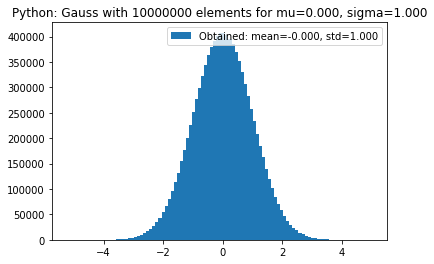

In [29]:
# ten million with Python
mu = 0.0
sigma = 1.0
N = 10000000
random.seed(1)
start1 = time()
list_value = [random.gauss(mu, sigma) for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
title = f"Python: Gauss with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 12.355411767959595 seconds, time to convert the list to a numpy array is 0.4900352954864502 seconds, time to plot hist is 0.535646915435791 seconds.


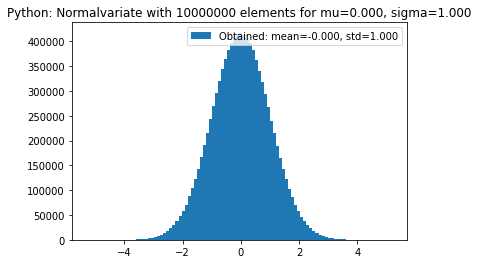

In [30]:
# ten million with Python
mu = 0.0
sigma = 1.0
N = 10_000_000
random.seed(1)
start1 = time()
list_value = [random.normalvariate(mu, sigma) for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
title = f"Python: Normalvariate with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 0.3460969924926758 seconds, time to convert the list to a numpy array is 0.4900352954864502 seconds, time to plot hist is 0.332165002822876 seconds.


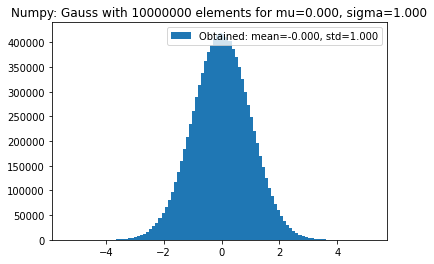

In [31]:
# ten million with Numpy
mu = 0.0
sigma = 1.0
N = 10_000_000
np.random.seed(1)
start1 = time()
nparray_value = np.random.randn(N)
end1 = time()
# let's plot the histogram
start2 = time()
title = f"Numpy: Gauss with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

For values of mu and sigma other than the default, stil the same steps for Python, but for Numpy we only have the (0, 1) so we need to multiply with sigma and add mu. 

list_value has 10000000 elements, time to fill list is 10.655413150787354 seconds, time to convert the list to a numpy array is 0.9206938743591309 seconds, time to plot hist is 0.9015932083129883 seconds.


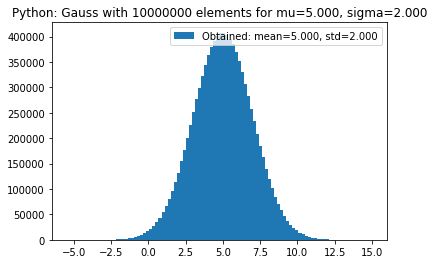

In [32]:
# ten million with Python
mu = 5.0
sigma = 2.0
N = 10_000_000
random.seed(1)
start1 = time()
list_value = [random.gauss(mu, sigma) for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
title = f"Python: Gauss with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 0.44211912155151367 seconds, time to convert the list to a numpy array is 0.9206938743591309 seconds, time to plot hist is 0.4554479122161865 seconds.


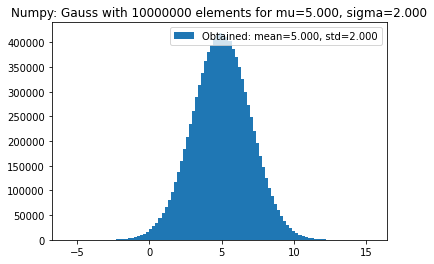

In [33]:
# ten million with Numpy
mu = 5.0
sigma = 2.0
N = 10_000_000
np.random.seed(1)
start1 = time()
nparray_value = mu + sigma * np.random.randn(N)
end1 = time()
# let's plot the histogram
start2 = time()
title = f"Numpy: Gauss with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 0.35596370697021484 seconds, time to convert the list to a numpy array is 0.9206938743591309 seconds, time to plot hist is 0.7318980693817139 seconds.


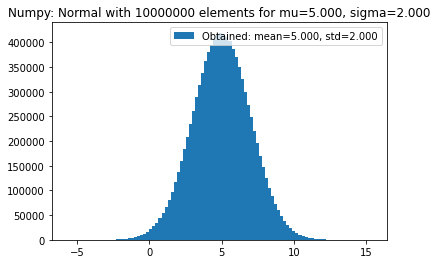

In [34]:
# ten million with Numpy
mu = 5.0
sigma = 2.0
N = 10_000_000
np.random.seed(1)
start1 = time()
nparray_value = np.random.normal(mu, sigma, N)
end1 = time()
# let's plot the histogram
start2 = time()
title = f"Numpy: Normal with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

# 3. Float from the lognormal distribution

https://en.wikipedia.org/wiki/Log-normal_distribution

Python: np.array([random.lognormvariate(mu, sigma) for _ in range(N)])

Numpy: np.random.lognormal(mu, sigma, N)

In [35]:
mu = 5.0
sigma = 2.0
N = 5
random.seed(1)
values = np.array([random.lognormvariate(mu, sigma) for _ in range(N)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
np.random.seed(1)
values = np.random.lognormal(mu, sigma, N)
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[ 500.15183148  144.25017362 1740.30290124 1131.11860089   75.723318  ]
type=<class 'numpy.ndarray'>, shape=(5,), dtype=float64, values=
[3822.61769476   43.66239358   51.60695734   17.35816074  837.83003578]


list_value has 10000000 elements, time to fill list is 20.91420578956604 seconds, time to convert the list to a numpy array is 0.8262012004852295 seconds, time to plot hist is 1.4019191265106201 seconds.


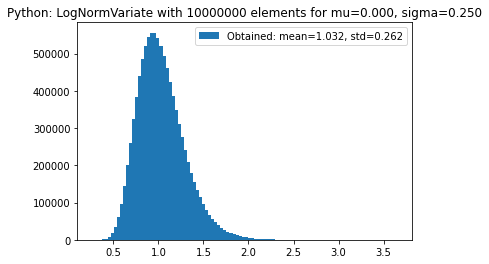

In [36]:
# ten million with Python
mu = 0.0
sigma = 0.25
N = 10_000_000
random.seed(1)
start1 = time()
list_value = [random.lognormvariate(mu, sigma) for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
title = f"Python: LogNormVariate with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 0.5891261100769043 seconds, time to convert the list to a numpy array is 0.8262012004852295 seconds, time to plot hist is 0.38060617446899414 seconds.


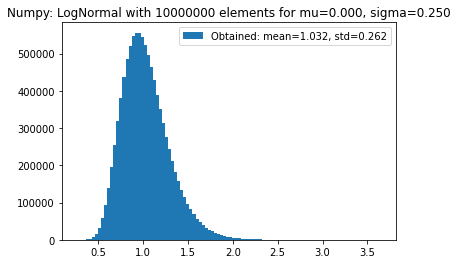

In [37]:
# ten million with Numpy
mu = 0.0
sigma = 0.25
N = 10_000_000
np.random.seed(1)
start1 = time()
nparray_value = np.random.lognormal(mu, sigma, N)
end1 = time()
# let's plot the histogram
start2 = time()
title = f"Numpy: LogNormal with {N} elements for mu={mu:.3f}, sigma={sigma:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = 100, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

# 4. Floats from other distributions

Python: https://www.w3schools.com/python/module_random.asp

Python: https://docs.python.org/3/library/random.html#real-valued-distributions